In [1]:
import numpy as np
import pandas as pd
import glob
import os
from plotnine import *

In [2]:
path = r'D:\Summer Practicum\1_Data\On_Time_Marketing_Carrier_On_Time_Performance_Beginning_January_2018_2023_All_Months'
all_files = glob.glob(os.path.join(path,'*.csv'))

# Read all files in the Data folder
df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

C:\Users\hrenck\AppData\Local\Temp\3\ipykernel_19396\2200835650.py:5: DtypeWarning: Columns (11,13,86,93) have mixed types. Specify dtype option on import or set low_memory=False.
C:\Users\hrenck\AppData\Local\Temp\3\ipykernel_19396\2200835650.py:5: DtypeWarning: Columns (11,13,85,86,93) have mixed types. Specify dtype option on import or set low_memory=False.
C:\Users\hrenck\AppData\Local\Temp\3\ipykernel_19396\2200835650.py:5: DtypeWarning: Columns (11,13,57,78,85,86,93) have mixed types. Specify dtype option on import or set low_memory=False.
C:\Users\hrenck\AppData\Local\Temp\3\ipykernel_19396\2200835650.py:5: DtypeWarning: Columns (11,13,86,93) have mixed types. Specify dtype option on import or set low_memory=False.
C:\Users\hrenck\AppData\Local\Temp\3\ipykernel_19396\2200835650.py:5: DtypeWarning: Columns (11,13,86,93) have mixed types. Specify dtype option on import or set low_memory=False.
C:\Users\hrenck\AppData\Local\Temp\3\ipykernel_19396\2200835650.py:5: DtypeWarning: Colu

In [3]:
print(df.shape)
df.info()

(7065617, 120)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7065617 entries, 0 to 7065616
Columns: 120 entries, Year to Unnamed: 119
dtypes: float64(73), int64(22), object(25)
memory usage: 6.3+ GB


In [4]:
#Percent of delayed flights
num_delayed = len(df[df["DepDelayMinutes"] > 0])
total_flights = len(df)

percent_delayed = (num_delayed / total_flights) * 100
print(f"Percentage of delayed flights: {percent_delayed:.2f}%")

Percentage of delayed flights: 37.94%


In [42]:
#average delay by month
avg_month_delay = df.groupby("Month")["DepDelayMinutes"].mean().reset_index()
print(avg_month_delay.head())

plot01 = ggplot(avg_month_delay, aes(x = 'Month', y = 'DepDelayMinutes')) + geom_line() + geom_point() + scale_x_continuous(breaks = np.arange(1, 13, 1)) + theme_classic() \
+ geom_col(fill="deepskyblue") + scale_x_continuous(breaks = np.arange(1, 13, 1)) \
       + theme_classic() + labs(title = "Average Delay by Month")

plot01.save(("month_depdelmins.png"))

   Month  DepDelayMinutes
0      1        16.299005
1      2        13.616579
2      3        15.911624
3      4        16.052765
4      5        15.253399


c:\ProgramData\anaconda3\envs\hannah_environment\Lib\site-packages\plotnine\scales\scales.py:48: PlotnineWarning: Scale for 'x' is already present.
Adding another scale for 'x',
which will replace the existing scale.

c:\ProgramData\anaconda3\envs\hannah_environment\Lib\site-packages\plotnine\ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
c:\ProgramData\anaconda3\envs\hannah_environment\Lib\site-packages\plotnine\ggplot.py:616: PlotnineWarning: Filename: month_depdelmins.png


In [44]:
#total number of delayed flights (>15mins) per month
total_month_delay = df.groupby("Month")["DepDel15"].sum().reset_index()

plot2 = ggplot(total_month_delay, aes(x = 'Month', y = 'DepDel15')) + geom_line() + geom_point() \
    + scale_x_continuous(breaks = np.arange(1, 13, 1)) + theme_classic() + labs(title = "Total number of delayed flights (>15mins) per month") \
    + scale_y_continuous(limits = (0, 150000))

plot2.save(("month_depdel15.png"))

c:\ProgramData\anaconda3\envs\hannah_environment\Lib\site-packages\plotnine\ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
c:\ProgramData\anaconda3\envs\hannah_environment\Lib\site-packages\plotnine\ggplot.py:616: PlotnineWarning: Filename: month_depdel15.png


In [46]:
#percentage of flights that were delayed per month

delayed_flights = df[df["DepDel15"]==1]
delayed_by_month = delayed_flights["Month"].value_counts().sort_index()
num_total_flights = df.groupby("Month")
total_by_month = num_total_flights["Month"].value_counts().sort_index()
percent_delayed = delayed_by_month / total_by_month * 100
percent_delayed = percent_delayed.reset_index()
percent_delayed.columns=['Month', 'PCT Delayed']
print(percent_delayed)

plot3 = ggplot(percent_delayed, aes(x = 'Month', y = 'PCT Delayed')) + geom_line() + geom_point() + scale_x_continuous(breaks = np.arange(1, 13, 1)) \
+ labs(title = "Percentage of Flights Delayed per Month") + theme_classic() + scale_y_continuous(limits = (0, 30))

plot3.save(("month_pctdelayed.png"))

    Month  PCT Delayed
0       1    20.636129
1       2    18.103087
2       3    21.861014
3       4    21.580589
4       5    20.705531
5       6    23.870165
6       7    23.453676
7       8    22.201943
8       9    16.621553
9      10    16.219122
10     11    18.187617
11     12    25.136732


c:\ProgramData\anaconda3\envs\hannah_environment\Lib\site-packages\plotnine\ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
c:\ProgramData\anaconda3\envs\hannah_environment\Lib\site-packages\plotnine\ggplot.py:616: PlotnineWarning: Filename: month_pctdelayed.png


In [48]:
#average of delay groups
avg_delay_groups = df.groupby("Month")["DepartureDelayGroups"].mean().reset_index()
print(avg_delay_groups.head())

plot4 = ggplot(avg_delay_groups, aes(x = 'Month', y = 'DepartureDelayGroups')) + geom_line() + geom_point() + scale_x_continuous(breaks = np.arange(1, 13, 1)) + theme_classic() \
+ labs(title = "Average of Delay Groups by Month")

plot4.save(("month_depdelgroup.png"))

   Month  DepartureDelayGroups
0      1              0.200417
1      2              0.017727
2      3              0.201934
3      4              0.228055
4      5              0.171195


c:\ProgramData\anaconda3\envs\hannah_environment\Lib\site-packages\plotnine\ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
c:\ProgramData\anaconda3\envs\hannah_environment\Lib\site-packages\plotnine\ggplot.py:616: PlotnineWarning: Filename: month_depdelgroup.png


In [49]:
#average delay by distance group
avg_delay_by_dist = df.groupby("DistanceGroup")["DepDelayMinutes"].mean().reset_index()
print(avg_delay_groups.head())

plot5 = ggplot(avg_delay_by_dist, aes(x = 'DistanceGroup', y = 'DepDelayMinutes')) + geom_line() + geom_point() + scale_x_continuous(breaks = np.arange(1, 13, 1)) \
+ labs(title = "Average delay by Distance Group") + scale_y_continuous(limits = (0, 20)) + theme_classic()

plot5.save(("distance_depdelmins.png"))

   Month  DepartureDelayGroups
0      1              0.200417
1      2              0.017727
2      3              0.201934
3      4              0.228055
4      5              0.171195


c:\ProgramData\anaconda3\envs\hannah_environment\Lib\site-packages\plotnine\ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
c:\ProgramData\anaconda3\envs\hannah_environment\Lib\site-packages\plotnine\ggplot.py:616: PlotnineWarning: Filename: distance_depdelmins.png


In [54]:
#average delay by day of week
avg_delay_by_day = df.groupby("DayOfWeek")["DepDelayMinutes"].mean().reset_index()

plot6 = ggplot(avg_delay_by_day, aes(x = 'DayOfWeek', y = 'DepDelayMinutes')) + geom_col(fill = "deepskyblue") + scale_x_continuous(breaks = np.arange(1, 7, 1)) + theme_classic() \
+ labs(title = "Average Delay by Day of Week")

plot6.save(("dayofweek_depdelaymins.png"))

c:\ProgramData\anaconda3\envs\hannah_environment\Lib\site-packages\plotnine\ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
c:\ProgramData\anaconda3\envs\hannah_environment\Lib\site-packages\plotnine\ggplot.py:616: PlotnineWarning: Filename: dayofweek_depdelaymins.png


In [37]:
#average delay by day of month
avg_delay_by_month_day = df.groupby("DayofMonth")["DepDelayMinutes"].mean().reset_index()

plot1 = ggplot(avg_delay_by_month_day, aes(x = 'DayofMonth', y = 'DepDelayMinutes')) + geom_col(fill="deepskyblue") + scale_x_continuous(breaks = np.arange(1, 31, 2)) \
+ theme_classic() + labs(title = "Average Delay by Day of Month")

plot1.save(("Delaybyday.png"))

c:\ProgramData\anaconda3\envs\hannah_environment\Lib\site-packages\plotnine\ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
c:\ProgramData\anaconda3\envs\hannah_environment\Lib\site-packages\plotnine\ggplot.py:616: PlotnineWarning: Filename: Delaybyday.png


In [55]:
#average delay by quarter
avg_delay_by_quarter = df.groupby("Quarter")["DepDelayMinutes"].mean().reset_index()

plot7 = ggplot(avg_delay_by_quarter, aes(x = 'Quarter', y = 'DepDelayMinutes')) + geom_col(fill = "deepskyblue") + scale_x_continuous(breaks = np.arange(1, 13, 1)) + theme_classic() \
+ labs(title = "Average Delay Minutes by Quarter")

plot7.save(("quarter_depdelaymins.png"))

c:\ProgramData\anaconda3\envs\hannah_environment\Lib\site-packages\plotnine\ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
c:\ProgramData\anaconda3\envs\hannah_environment\Lib\site-packages\plotnine\ggplot.py:616: PlotnineWarning: Filename: quarter_depdelaymins.png


In [58]:
#average delay by operating airline
avg_delay_by_airline = df.groupby("Operating_Airline ")["DepDelayMinutes"].mean().reset_index()

plot8 = ggplot(avg_delay_by_airline, aes(x = 'Operating_Airline ', y = 'DepDelayMinutes')) + geom_col(fill="deepskyblue") + geom_hline(yintercept=15.59, color="Red") \
+ theme_classic() + labs(title = "Average Delay by Operating Airline")

plot8.save(("operatingairline_depdelayminutes.png"))


c:\ProgramData\anaconda3\envs\hannah_environment\Lib\site-packages\plotnine\ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
c:\ProgramData\anaconda3\envs\hannah_environment\Lib\site-packages\plotnine\ggplot.py:616: PlotnineWarning: Filename: operatingairline_depdelayminutes.png


In [65]:
#average delay by origin city
avg_delay_by_origin_city = df.groupby("OriginCityName")["DepDelayMinutes"].mean().reset_index()

plot9 = ggplot(avg_delay_by_origin_city, aes(x = 'OriginCityName', y = 'DepDelayMinutes')) + geom_col(fill="deepskyblue")\
      + geom_hline(yintercept=avg_delay_by_origin_city["DepDelayMinutes"].mean(), color="Red") + theme_classic() \
       + labs(title="Average delay by origin city") 
plot9.save(("origincity_depdelaymins.png"))

c:\ProgramData\anaconda3\envs\hannah_environment\Lib\site-packages\plotnine\ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
c:\ProgramData\anaconda3\envs\hannah_environment\Lib\site-packages\plotnine\ggplot.py:616: PlotnineWarning: Filename: origincity_depdelaymins.png


In [66]:
#average delay by origin state
avg_delay_by_origin_state = df.groupby("OriginState")["DepDelayMinutes"].mean().reset_index()

plot10 = ggplot(avg_delay_by_origin_state, aes(x = 'OriginState', y = 'DepDelayMinutes')) + geom_col(fill="deepskyblue") + geom_hline(yintercept=avg_delay_by_origin_state["DepDelayMinutes"].mean(), color="Red") \
+labs(title = "Average Delay by Origin State")

#Delaware is the state with the highest average delay (36.31 mins)

plot10.save(("originstate_depdelaymins.png"))

c:\ProgramData\anaconda3\envs\hannah_environment\Lib\site-packages\plotnine\ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
c:\ProgramData\anaconda3\envs\hannah_environment\Lib\site-packages\plotnine\ggplot.py:616: PlotnineWarning: Filename: originstate_depdelaymins.png


In [68]:
#average delay by dest city
avg_delay_by_dest_city = df.groupby("DestCityName")["DepDelayMinutes"].mean().reset_index()

plot11 = ggplot(avg_delay_by_dest_city, aes(x = 'DestCityName', y = 'DepDelayMinutes')) + geom_col() + geom_hline(yintercept=avg_delay_by_dest_city["DepDelayMinutes"].mean(), color="Red") \
+labs(title = "Average Delay by Dest City")

plot11.save(("destcity_depdelaymins.png"))

c:\ProgramData\anaconda3\envs\hannah_environment\Lib\site-packages\plotnine\ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
c:\ProgramData\anaconda3\envs\hannah_environment\Lib\site-packages\plotnine\ggplot.py:616: PlotnineWarning: Filename: destcity_depdelaymins.png


In [69]:
#average delay by dest state
avg_delay_by_dest_state = df.groupby("DestState")["DepDelayMinutes"].mean().reset_index()

plot12 = ggplot(avg_delay_by_dest_state, aes(x = 'DestState', y = 'DepDelayMinutes')) + geom_col() + geom_hline(yintercept=avg_delay_by_dest_state["DepDelayMinutes"].mean(), color="Red")\
+labs(title = "Average delay by dest state") + theme_classic()

plot12.save(("deststate_depdelaymins.png"))

c:\ProgramData\anaconda3\envs\hannah_environment\Lib\site-packages\plotnine\ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
c:\ProgramData\anaconda3\envs\hannah_environment\Lib\site-packages\plotnine\ggplot.py:616: PlotnineWarning: Filename: deststate_depdelaymins.png


we are starting anova for month

In [62]:
train = pd.read_csv(r"D:\Summer Practicum\1_Data\training.csv", low_memory = False)

#train_data_path = r'D:\Summer Practicum\1_Data\training.csv'
#test_data_path = r'D:\Summer Practicum\1_Data\testing.csv'
#validation_data_path = r'D:\Summer Practicum\1_Data\validation.csv'

In [61]:
import statsmodels.formula.api as smf


c:\ProgramData\anaconda3\envs\hannah_environment\Lib\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_qq : Removed 73177 rows containing non-finite values.
c:\ProgramData\anaconda3\envs\hannah_environment\Lib\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_qq_line : Removed 73177 rows containing non-finite values.


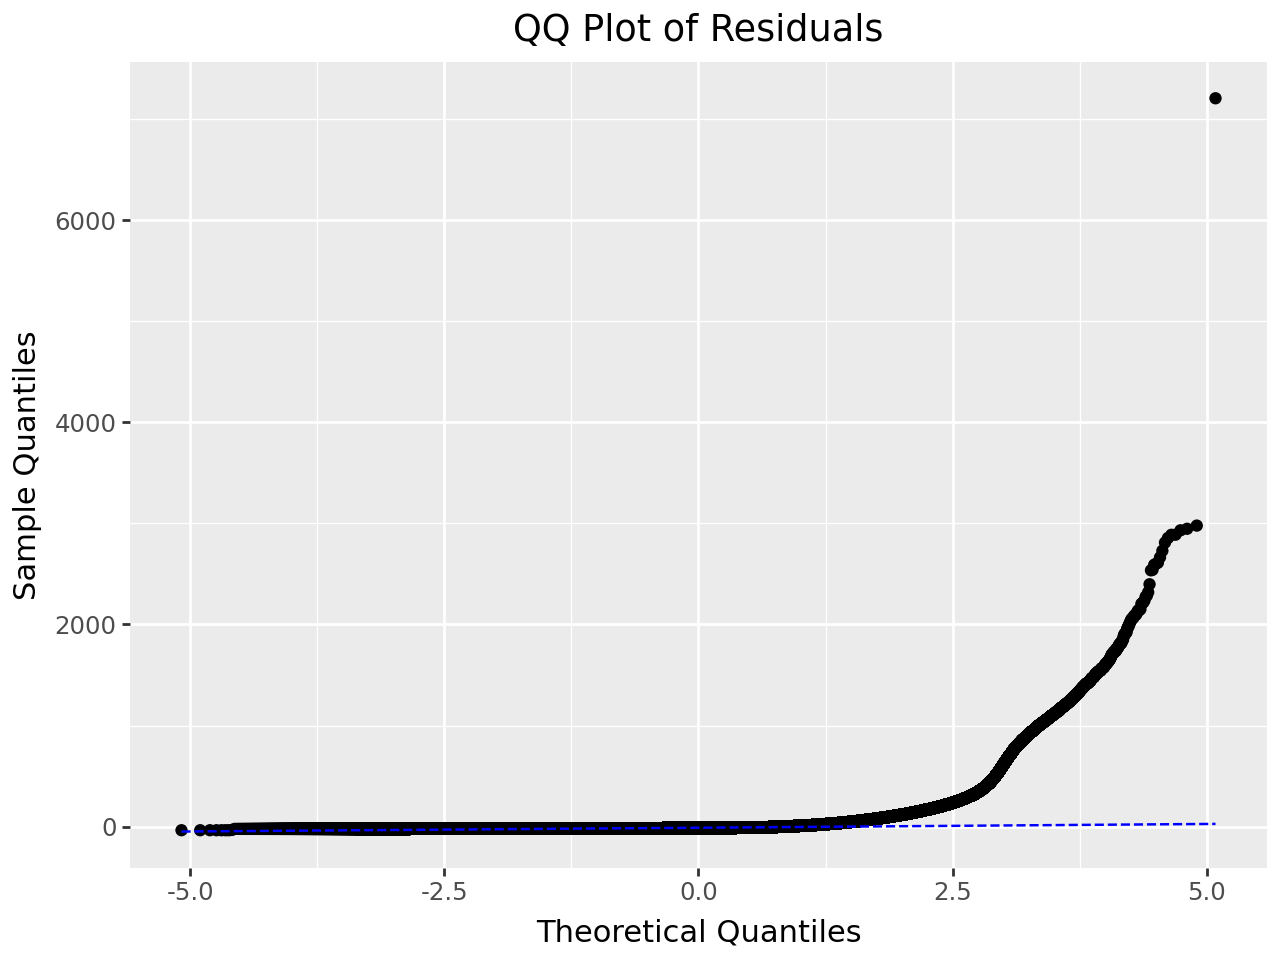

c:\ProgramData\anaconda3\envs\hannah_environment\Lib\site-packages\plotnine\ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
c:\ProgramData\anaconda3\envs\hannah_environment\Lib\site-packages\plotnine\ggplot.py:616: PlotnineWarning: Filename: qqplot_month.png
c:\ProgramData\anaconda3\envs\hannah_environment\Lib\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_qq : Removed 73177 rows containing non-finite values.
c:\ProgramData\anaconda3\envs\hannah_environment\Lib\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_qq_line : Removed 73177 rows containing non-finite values.


In [71]:
model = smf.ols("DepDelayMinutes ~ C(Month)", data=train).fit()
df["resid"]=model.resid
p = (
ggplot(train, aes(sample="resid")) +
geom_qq() +
geom_qq_line(color="blue", linetype="dashed") +
labs(title="QQ Plot of Residuals",
x="Theoretical Quantiles",
y="Sample Quantiles"))
p.show()

p.save(("qqplot_month.png"))

In [ ]:
df[df['Month']=='Jan']['DepDelayMinutes']
df[df['Month']=='Feb']['DepDelayMinutes']
df[df['Month']=='Mar']['DepDelayMinutes']
df[df['Month']=='Apr']['DepDelayMinutes']
df[df['Month']=='May']['DepDelayMinutes']
df[df['Month']=='Jun']['DepDelayMinutes']
df[df['Month']=='Jul']['DepDelayMinutes']
df[df['Month']=='Aug']['DepDelayMinutes']
df[df['Month']=='Sep']['DepDelayMinutes']
df[df['Month']=='Oct']['DepDelayMinutes']
df[df['Month']=='Nov']['DepDelayMinutes']
df[df['Month']=='Dec']['DepDelayMinutes']
l_test=sp.stats.levene(US, Japan, Germany)
print(f"p-value: {l_test.pvalue:4f}")

In [5]:
for month in list(df["Month"].unique()):
    print(month)

10
11
12
4
5
6
7
8
9
1
2
3


c:\ProgramData\anaconda3\envs\hannah_environment\Lib\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_qq : Removed 73177 rows containing non-finite values.
c:\ProgramData\anaconda3\envs\hannah_environment\Lib\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_qq_line : Removed 73177 rows containing non-finite values.


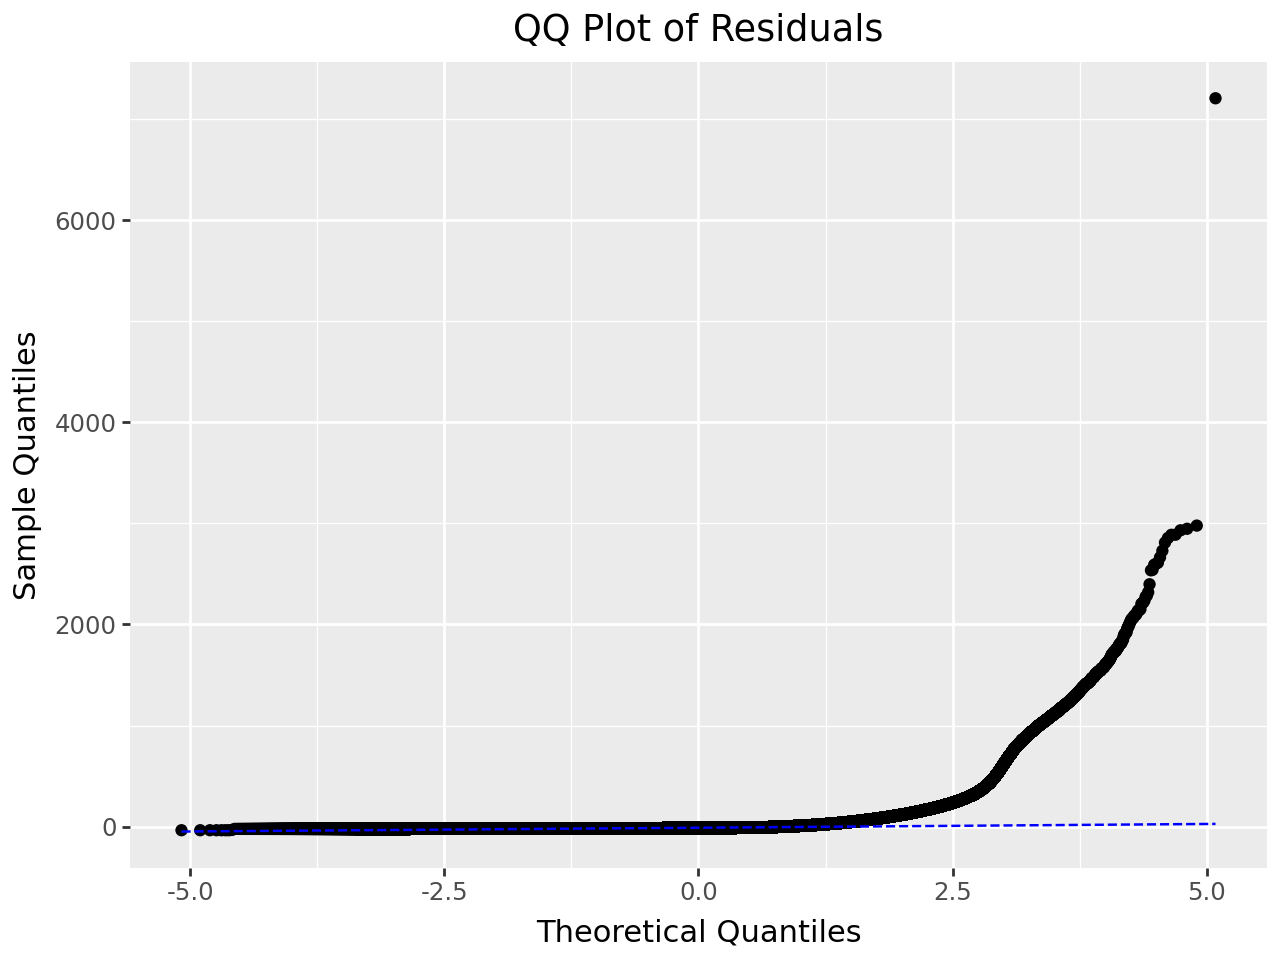

In [63]:
model = smf.ols("DepDelayMinutes ~ C(DestState)", data=train).fit()
train["resid"]=model.resid
p = (
ggplot(train, aes(sample="resid")) +
geom_qq() +
geom_qq_line(color="blue", linetype="dashed") +
labs(title="QQ Plot of Residuals",
x="Theoretical Quantiles",
y="Sample Quantiles"))
p.show()